# 1. Introduction

### Domain-specific area

"Cancer remains as the leading cause of morbidity and mortality, with an estimate of 1.9 million new cancer cases diagnosed and 609,360 cancer deaths in the United States in 2022."" By 2040, the global burden is expected to reach 28.0 million new cancer cases and 16.2 million cancer deaths, solely due to the growth and aging of the population."

Though it may appear that cancers are fatal and uncurable, they are actually preventable and treatable, especially in the early stages. It has been found that early cancer diagnosis is associated with a significantly higher survival rate, lower mortality, and lower associated costs. Early cancer stages generally require less complex treatments, which are often less costly as compared to late-stage treatments.

However, individuals may not notice signs of cancer early, or they may just not think of it seriously, resulting in a late diagnosis. There could also be delays in appointments due to unexpected issues.

One way to detect cancer is through screening. It helps with detecting pre-cancer conditions, which is important for early cancer diagnosis. When symptoms start to appear, they have often advanced to a later stage. (cancer.org shows some of the most common signs and symptoms of lung cancer.) However, not many people would make the time and effort to go for regular checkups, especially when they are not experiencing any signs. It would be good if there were a way for people to predict their chances of being diagnosed with cancer in the future.

In this coursework, I will be using machine learning to detect one's risk of getting cancer by training a model based on past patients' symptoms and also evaluating the accuracy of this model at the end. I believe this will be a cost-effective way of assisting individuals in detecting pre-cancer conditions, as they can simply indicate the presence of cancerous symptoms and learn about their future risk. This model would aid in the process of cancer diagnosis, as well as allow patients to learn more about the signs to look out for. With such a system in place, the diagnosing process will be streamlined, reducing the number of cases of late diagnosis. 

[359 words]

*References at the bottom*


### Dataset

The dataset that I will be using was downloaded from Kaggle. Initially, I wanted to work on a dataset that was from my home country, Singapore, but I was not able to acquire one without applying for permission to access the patient's data. Therefore, I will be using a lung cancer dataset downloaded from Kaggle. 

This dataset was acquired through surveys with patients (both with and without lung cancer). It contains basic patient information (gender and age), common symptoms relating to lung cancer, and whether they were diagnosed with it. This dataset is in a csv file format, and contains a total of 16 columns, of which 14 are common lung cancer symptoms. Most of the data (symptoms) are represented with boolean values, 1 for "No" and 2 for "Yes". There are a total of 309 entries (rows) in this dataset, which signifies that 309 patients were surveyed to acquire these data. I will have to clean the data, remove duplicate entries, and change the boolean values entry (1, 2) to either "YES"/"NO", or 0/1. Even though there aren't as many entries (rows) in this dataset, there are quite a number of symptoms available, so the model produced will still be functional.

With these attributes, I will be able to check which symptoms have a higher risk of developing in the future. I will have to first make sure that the data is "clean", before proceeding to train a prediction model. Visualization plots will be done to help with understanding the dataset, as well as how each symptom relates to lung cancer. At the end of this project, an evaluation of the model's accuracy will be done.

[277 words]

*Link to dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer*

### Objectives

The objective of this project is to allow individuals to quickly assess their chances of developing lung cancer in the future. The end goal of this project is to have a system that allows people to answer questions relating to the symptoms they are experiencing to get a rough gauge of their risks. This will be a quick and cost-efficient way to predict cancer chances and allow more people to be aware of their health risks.

Most people are reluctant to get regular checkups done due to both time and cost issues, which is one of the contributing factors to late cancer diagnosis. With such a system implemented in the form of a digital survey or questionnaire, individuals could also learn about what symptoms to look out for, which could potentially allow earlier detection of cancer. As stated above, early cancer diagnosis greatly increases the chances of survival, as well as decreasing treatment costs.

Long waiting times at hospitals also result in late diagnosis. Hospitals could get the patients to fill out the questionnaire to get a gauge on their risks, and then schedule their appointments based on their urgency. I believe this would greatly reduce misdiagnosis and late diagnosis, making the screening process more efficient.

Lung cancer is one of the cancers that causes the highest mortality rate. Most of the time, symptoms start to appear at a late stage. "Even when lung cancer does cause symptoms, many people may mistake them for other problems, such as an infection or long-term effects from smoking." This is one of the factors for late diagnosis. With the simple survey, they could understand if their symptoms were from other infections, or if they should get a checkup.

[285 words]

# 2. Implementation

### Preprocessing
- Appropriate libraries like pandas, matplotlib, seaborn will be used to read the csv file, process the data to ready it for training the prediction model.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
dataset = pd.read_csv("./survey_lung_cancer.csv")

# get the first 5 rows
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
# Check basic information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

From the output above, we can see that the dataset has a shape of (309, 16), where there are 309 rows, and 16 columns. Except for the 'GENDER' and 'LUNG_CANCER' column, all other columns have a int64 datatype.

In [4]:
# Check for duplicates in the dataset
dataset.duplicated().sum()

33

In [5]:
# Since there are duplicates, I have to remove them from the dataset
dataset=dataset.drop_duplicates()
dataset.shape

(276, 16)

After removing duplicates, the dataset has a shape of (276, 16), where there are 276 rows, and 16 columns.

In [6]:
# check for null values
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Statistical summary
- Statistical summary of the data will be done, calculating the measures of central tendency, measures of spread and concluding the type of distribution

In [7]:
# get the basic statistics of the dataset
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


I are unable to acquire useful information from the output above, so further processing needs to be done. First, I will need to change the data values used to represent the attributes, as it is rather confusing.

In [8]:
# copy the dataset
dataset_copy = dataset.copy()

# replaces each column that is represented with 1 and 2, to NO and YES
for col in dataset_copy.columns:
    dataset_copy[col] = dataset_copy[col].replace({1 : "NO" , 2 : "YES"})
    
# get the first 5 rows
dataset_copy.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


In [9]:
# get the basic statistics of the dataset_copy
dataset_copy.describe()

,AGE
count,276.000000
mean,62.909420
std,8.379355
min,21.000000
25%,57.750000
50%,62.500000
75%,69.000000
max,87.000000


The above output allows us to get the count, mean, standard deviation, min, max, quartiles values for the 'AGE' column.

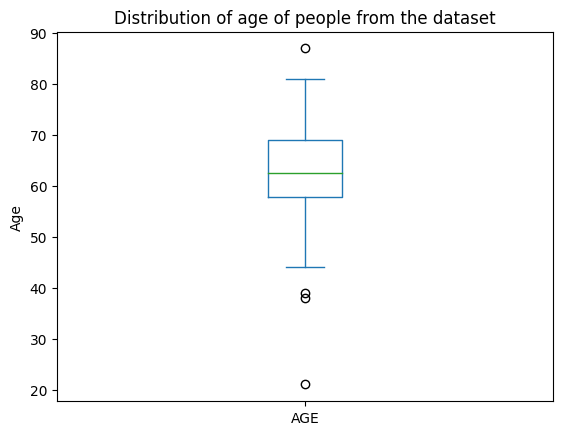

In [10]:
# Calculate the Interquartile range for age
ax = dataset_copy["AGE"].plot.box()
ax.set_title("Distribution of age of people from the dataset")
ax.set_ylabel("Age")
plt.show()

To get a visualisation of the interquartile range, a box plot is used. From the output, we can get a visualized view of the measures of central tendency and spread.

In [11]:
# Calculate mode for nominal datatypes
# get all columns, except for "AGE" column
dataset_nominal = dataset_copy.loc[:, dataset_copy.columns != "AGE"]

# for each nominal datatype column, count the number of values
for col in dataset_nominal.columns:
    print(col, ":")
    print("--------------------------")
    print(dataset_nominal[col].value_counts())
    print("\n")

GENDER :
--------------------------
M    142
F    134
Name: GENDER, dtype: int64


SMOKING :
--------------------------
YES    150
NO     126
Name: SMOKING, dtype: int64


YELLOW_FINGERS :
--------------------------
YES    159
NO     117
Name: YELLOW_FINGERS, dtype: int64


ANXIETY :
--------------------------
NO     139
YES    137
Name: ANXIETY, dtype: int64


PEER_PRESSURE :
--------------------------
YES    140
NO     136
Name: PEER_PRESSURE, dtype: int64


CHRONIC DISEASE :
--------------------------
YES    144
NO     132
Name: CHRONIC DISEASE, dtype: int64


FATIGUE  :
--------------------------
YES    183
NO      93
Name: FATIGUE , dtype: int64


ALLERGY  :
--------------------------
YES    151
NO     125
Name: ALLERGY , dtype: int64


WHEEZING :
--------------------------
YES    151
NO     125
Name: WHEEZING, dtype: int64


ALCOHOL CONSUMING :
--------------------------
YES    152
NO     124
Name: ALCOHOL CONSUMING, dtype: int64


COUGHING :
--------------------------
YES    159

The above output counts the number of 'YES' and 'NO' for each column. However, without proper visualization, it's hard to conclude anything from these values.

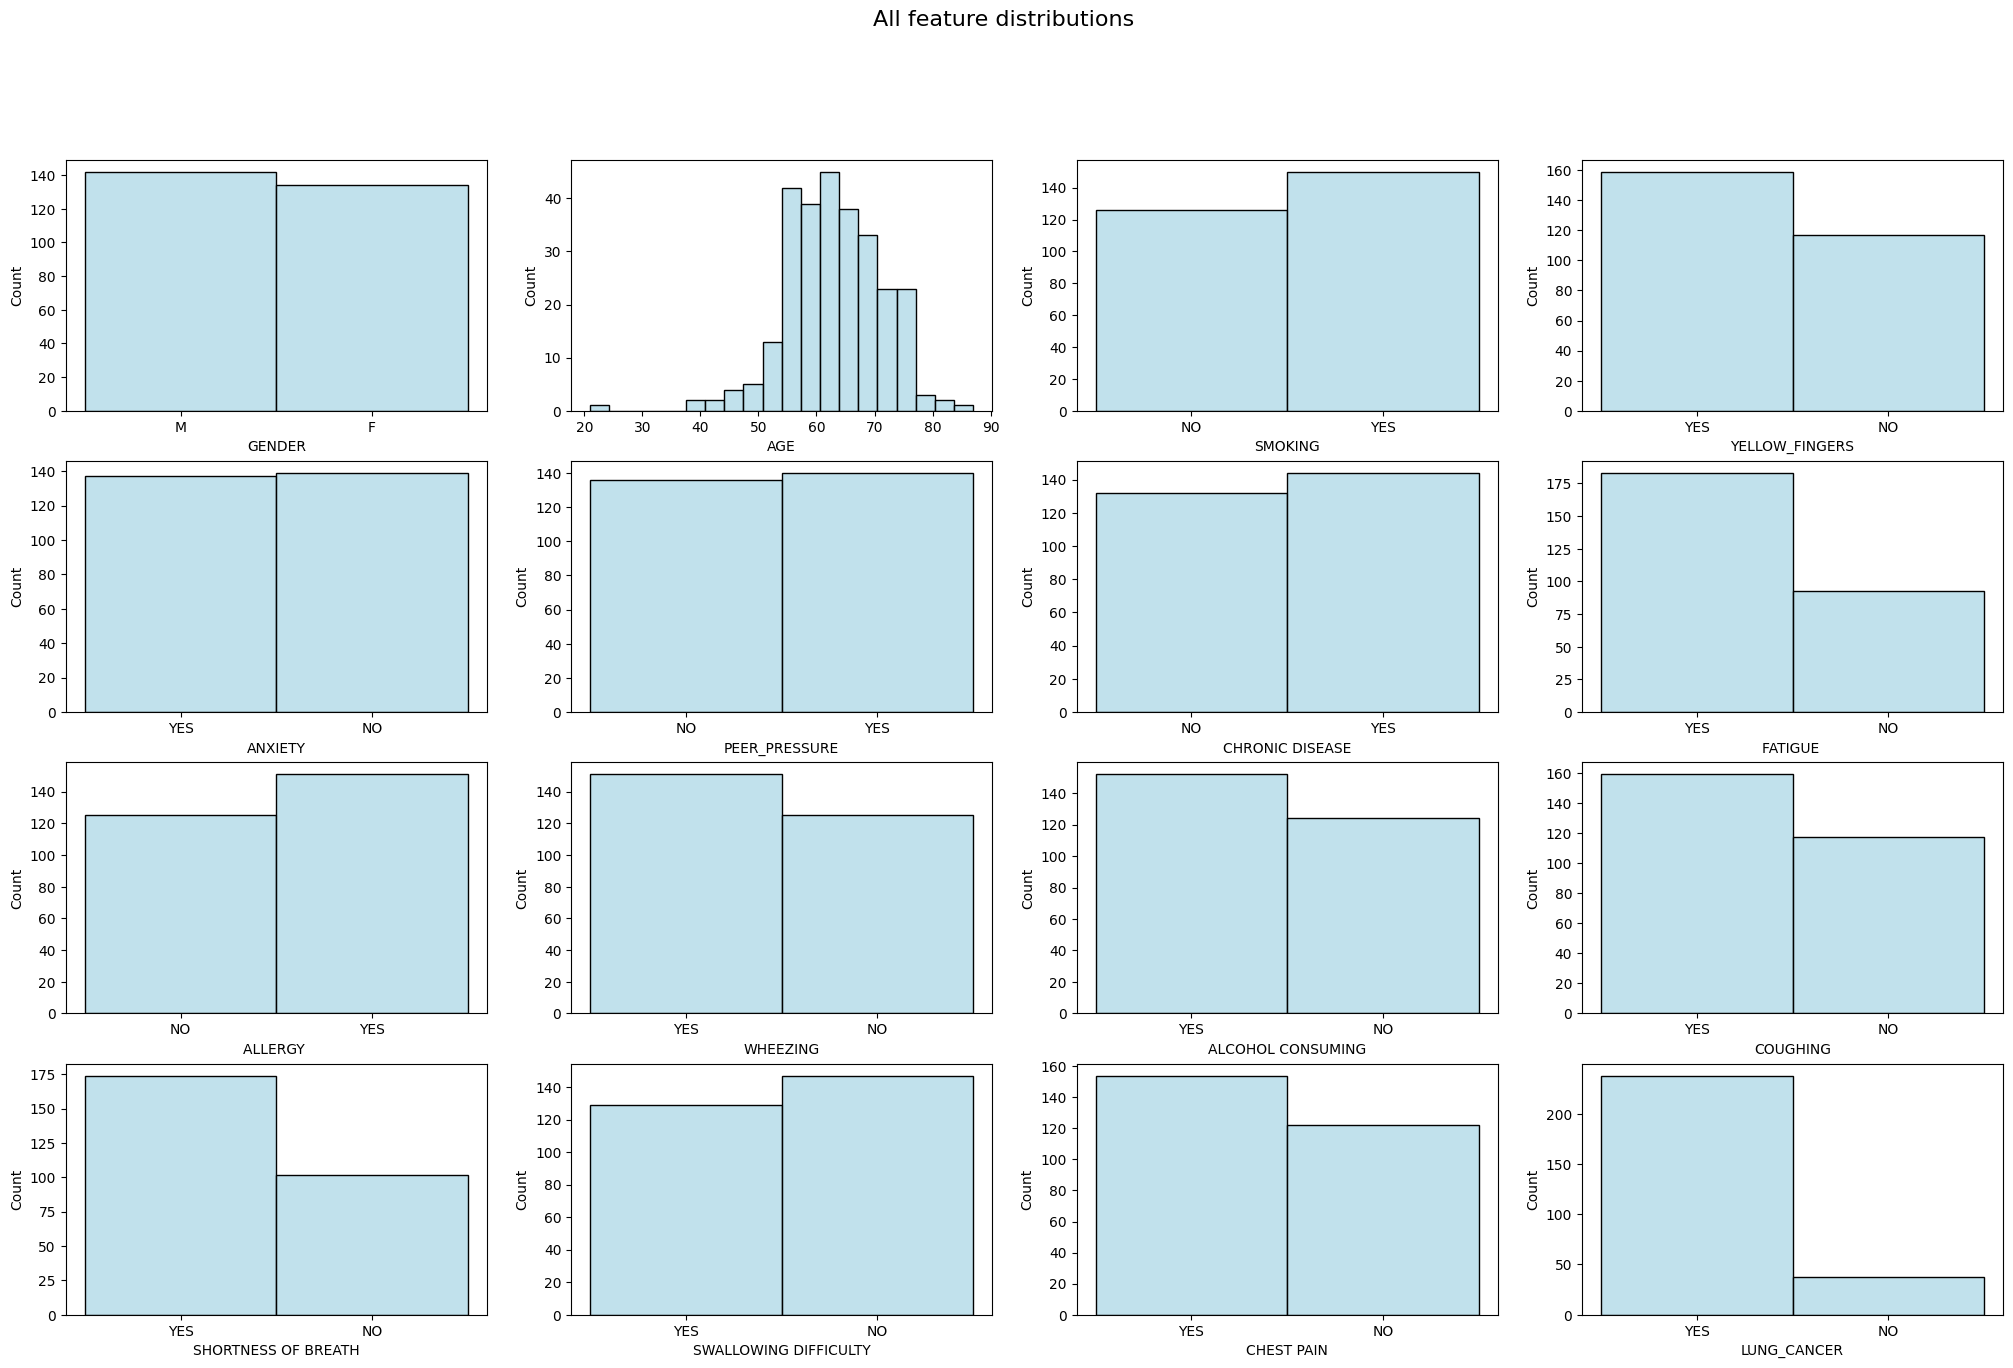

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15))
fig.suptitle('All feature distributions', fontsize=16)

axes = axes.reshape(16,)

# for each column, plot a histogram
for i, col in enumerate(dataset_copy.columns):
    sns.histplot(ax = axes[i],data = dataset_copy, x = col, color="lightblue")

The above output shows histograms for each attribute in the dataset.

### Data visualization
- Appropriate plots will be crafted based on the dataset for better visualization

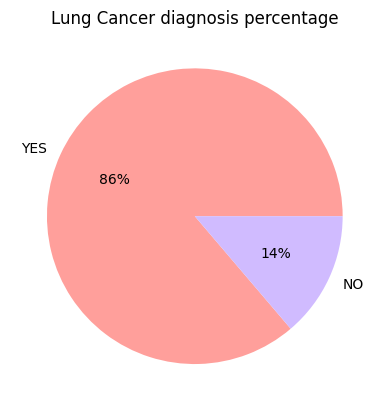

In [13]:
#define data
data = dataset_copy["LUNG_CANCER"].value_counts()
labels = ['YES', 'NO']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[3:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(label="Lung Cancer diagnosis percentage")
plt.show()

We can see that in our dataset, 86% are diagnosed with lung cancer, while 14% are not.

In [14]:
# seperate dataframe into two based on positive and negative diagnosis
dataset_pos=dataset_copy[dataset_copy['LUNG_CANCER'] == "YES"]
dataset_neg=dataset_copy[dataset_copy['LUNG_CANCER'] == "NO"]

Next, we seperate positive casses by gender.

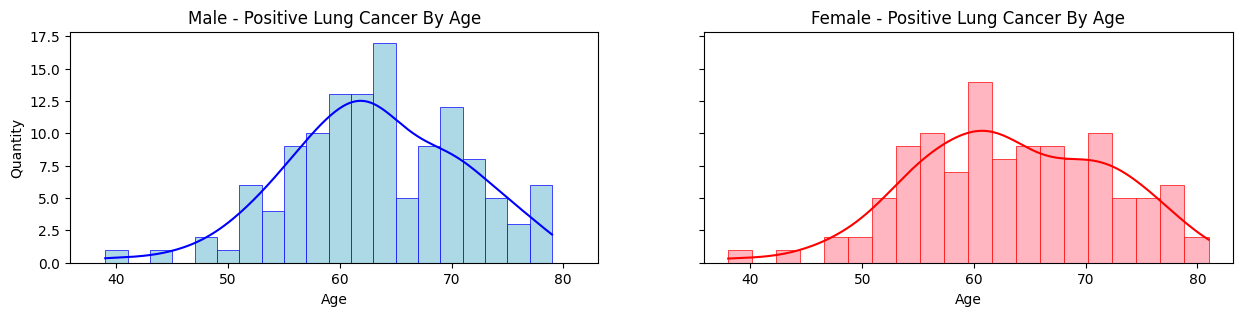

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3), sharex=True,sharey=True)

# plot first histogram
sns.histplot(dataset_pos[dataset_pos["GENDER"]=="M"]["AGE"],kde=True, color='lightblue', bins=20, ax=axes[0], alpha=1, edgecolor='blue', linewidth=0.5)
axes[0].lines[0].set_color('blue')
axes[0].set_title("Male - Positive Lung Cancer By Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Quantity")

# plot second histogram
sns.histplot(dataset_pos[dataset_pos["GENDER"]=="F"]["AGE"],kde=True, color='lightpink', bins=20, ax=axes[1], alpha=1, edgecolor='red', linewidth=0.5)
axes[1].lines[0].set_color('red')
axes[1].set_title("Female - Positive Lung Cancer By Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Quantity")

plt.show()

Combine the 2 histograms for easier comparison:

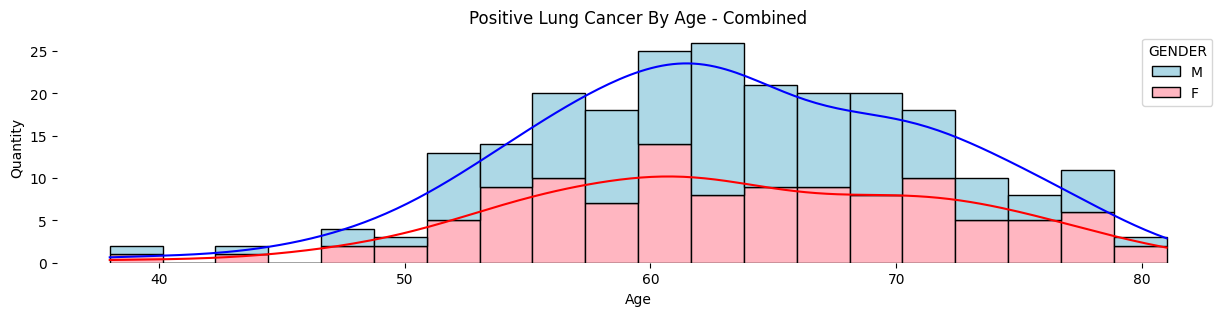

In [16]:
plt.subplots(figsize=(15, 3))
p = sns.histplot(data=dataset_pos,x="AGE",hue="GENDER", palette=['lightblue', 'lightpink'],multiple="stack", kde=True, bins=20, alpha=1)
p.axes.lines[0].set_color('red')
p.axes.lines[1].set_color('blue')
p.axes.set_title("Positive Lung Cancer By Age - Combined")
plt.ylabel("Quantity")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

Now, plot histogram for each symptom, for patients that are diagnosed with lung cancer. I will be plotting to show gender compared to symptoms count.

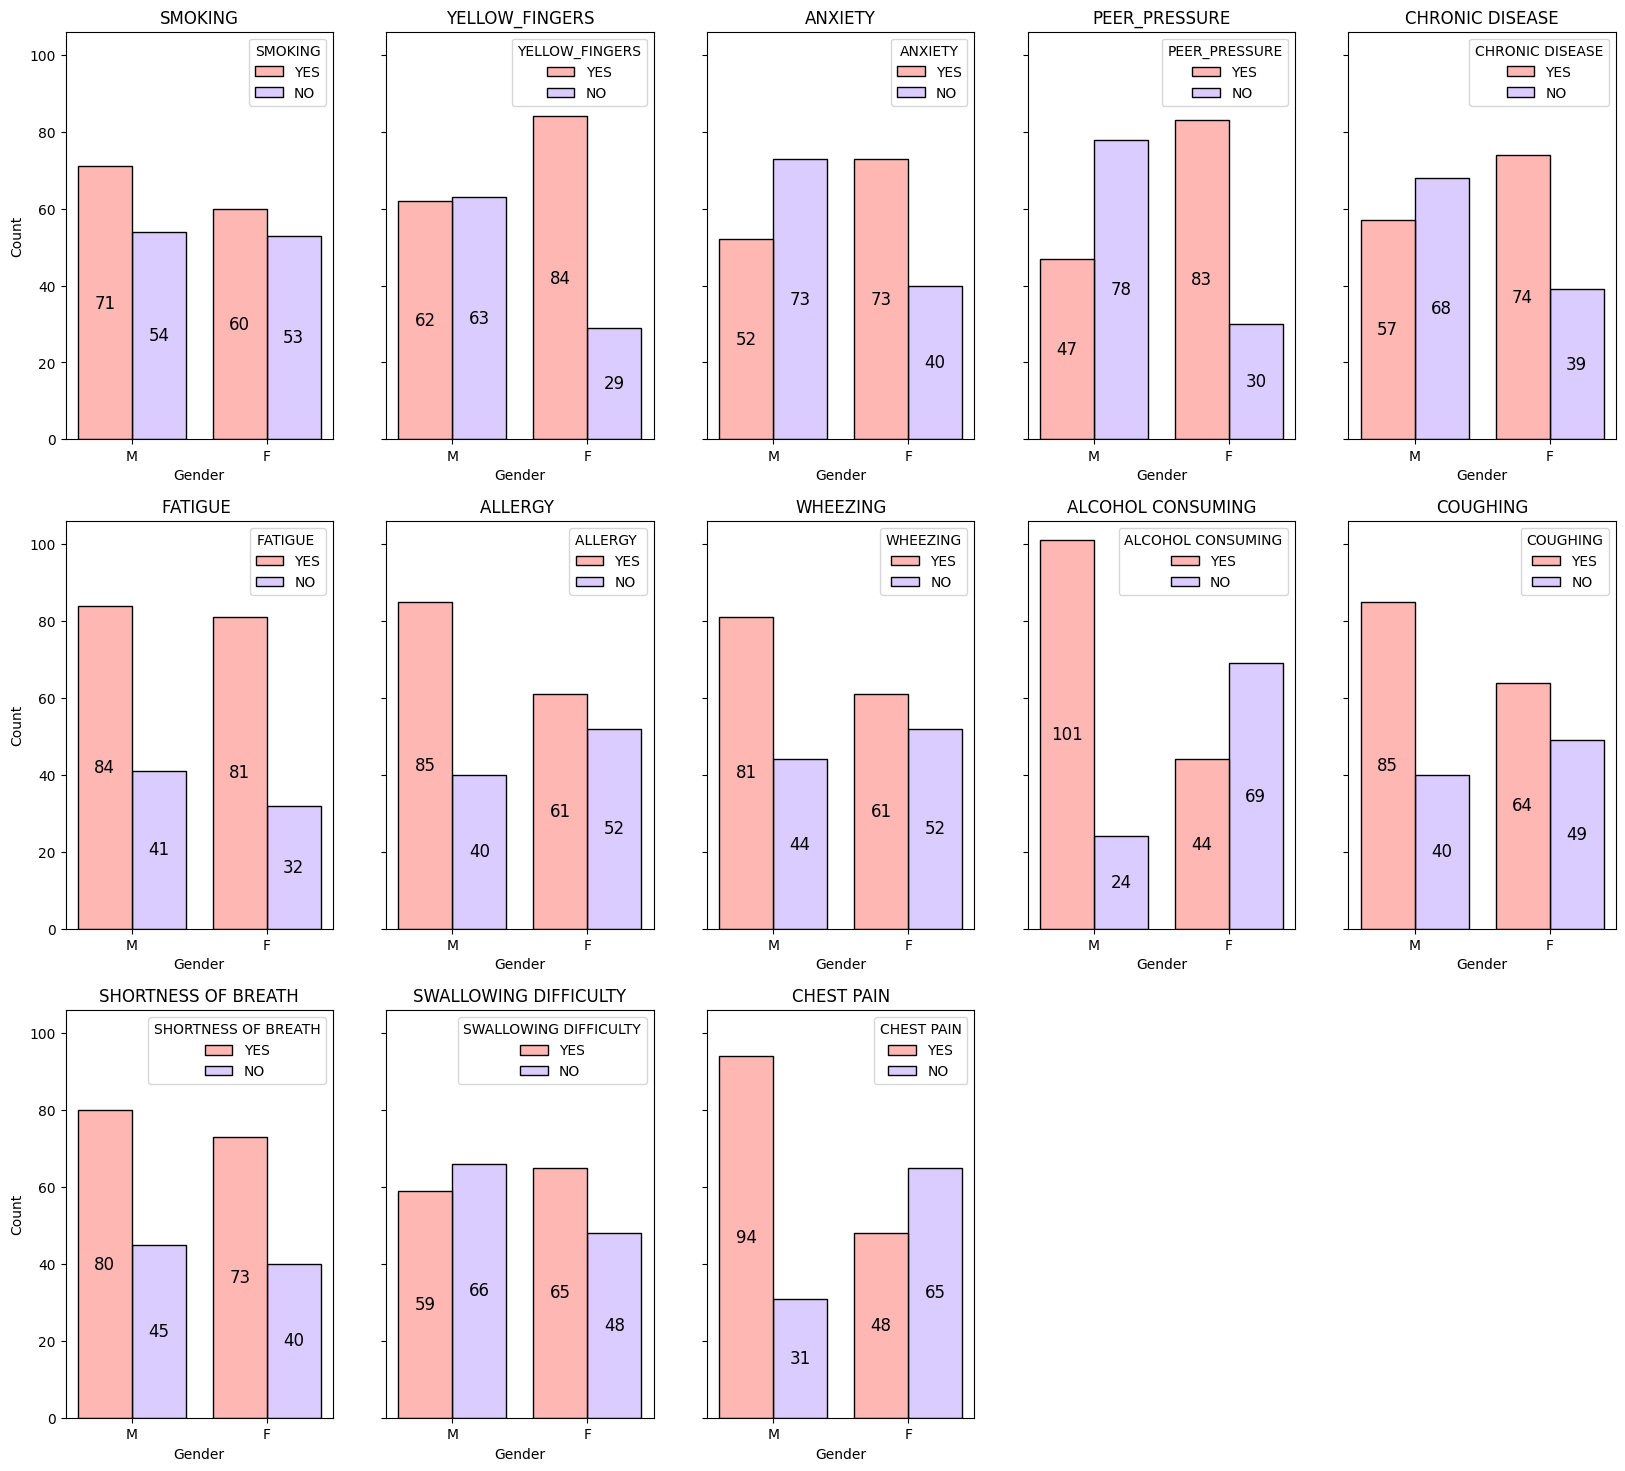

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 18), sharey=True)

axes = axes.reshape(15,)

# remove the columns that are not symptoms
dataset_pos_temp = dataset_pos.copy().drop(columns=['GENDER', 'AGE', 'LUNG_CANCER'])

# set the color palette to use
palette = sns.color_palette('pastel')[3:5]

#for each column, plot a histogram
for i, col in enumerate(dataset_pos_temp.columns):
    # plot the histogram
    ax = sns.histplot(ax = axes[i], data=dataset_pos_temp, x=dataset_pos["GENDER"], 
                      hue=col, hue_order=["YES", "NO"], palette=palette, multiple="dodge", shrink=0.8)
    
    # set the title of each histogram to the col name (symptoms)
    ax.set_title(col)
    ax.set_xlabel("Gender")
    ax.set_ylabel("Count")
    
    # show the value for each bar
    for container in axes[i].containers:
        axes[i].bar_label(container,label_type="center",size=12,color="black")

# off the axis of the 2 extra plots
axes[13].set_axis_off()
axes[14].set_axis_off()

# show the plot
plt.show()

This gives us a detailed overview of our data.

### Machine learning model
- Features will have to be carefully selected to be used in training the model. The dataset will have to be split into training and testing sets for creating the prediction model

Before training a machine learning model, first I have to ensure that my dataset contains the correct datatype. In the cell below, I will be changing all data entries to 0 and 1, representing "NO" and "YES". A temporary dataset will be used, to also calculate correlation between features in the later parts.

In [18]:
# make a copy of the dataset
dataset_temp=dataset.copy()

# replaces each column that is represented with 1 and 2, to NO and YES
for col in dataset_temp.columns:
    dataset_temp[col] = dataset_temp[col].replace({1 : 0 , 2 : 1})

# change the boolean "YES" and "NO" to 1 or 0, so that it shows in the heatmap
dataset_temp["LUNG_CANCER"] = dataset_temp["LUNG_CANCER"].replace({"YES" : 1 , "NO" : 0})

dataset_temp

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,F,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,M,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,M,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


Here, I am calculating correlation between features, with the temporary dataset.

In [19]:
# find correlation between features
dataset_correlation = dataset_temp.corr()

dataset_correlation

/var/folders/lx/3rz13qsd54731cpmp17gdcd80000gn/T/ipykernel_71921/110640650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_correlation = dataset_temp.corr()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767,0.294422


It is hard to conclude from these values, so plot a heatmap for better visualization

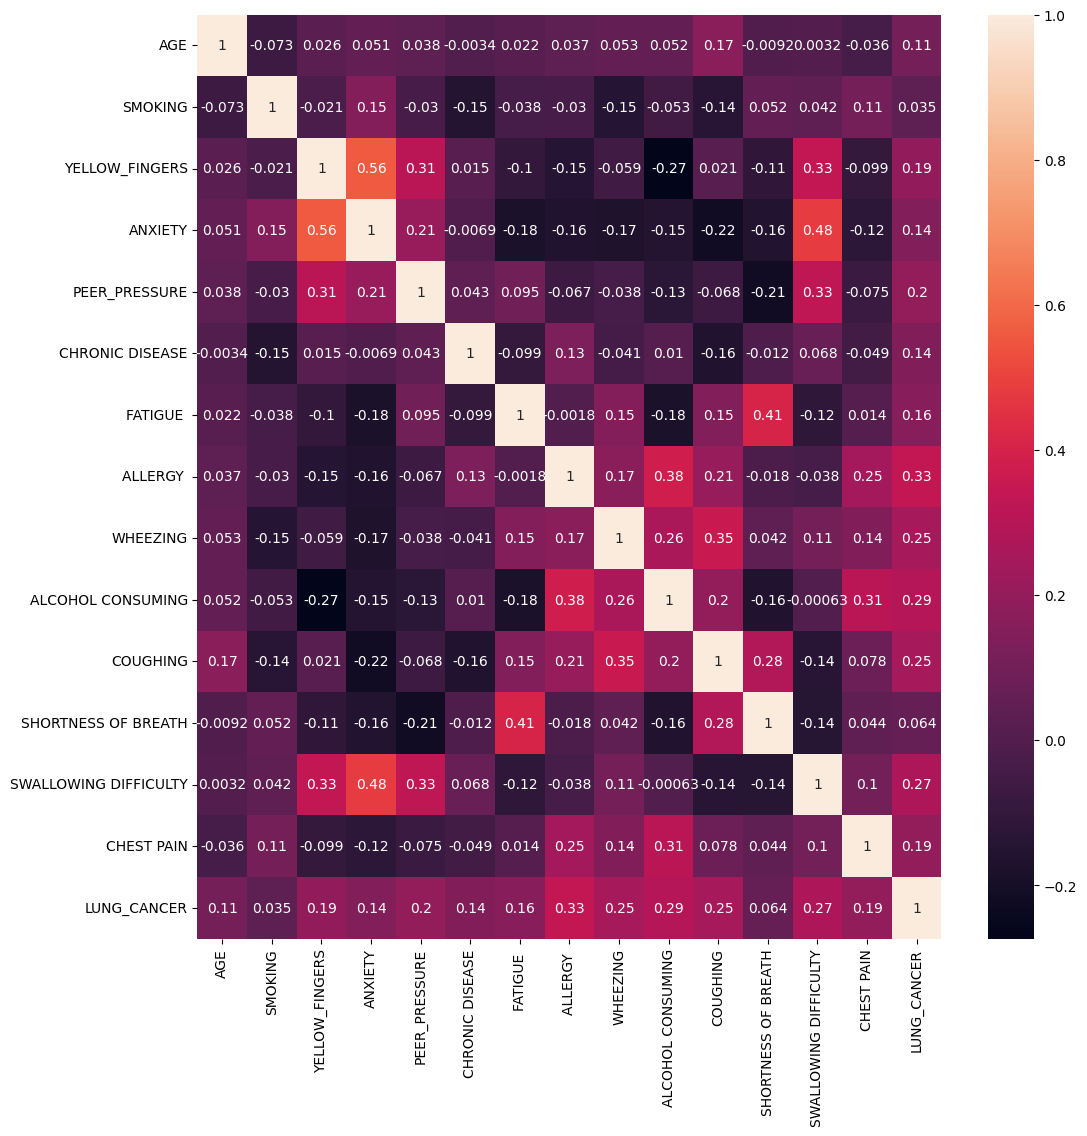

In [20]:
# plot the heatmap
plt.figure(figsize=(12,12))
sns.heatmap(dataset_correlation, annot=True);

Now, show heatmap values that are larger than 0.3, which means symptoms that correlate more than 30%

<AxesSubplot: >

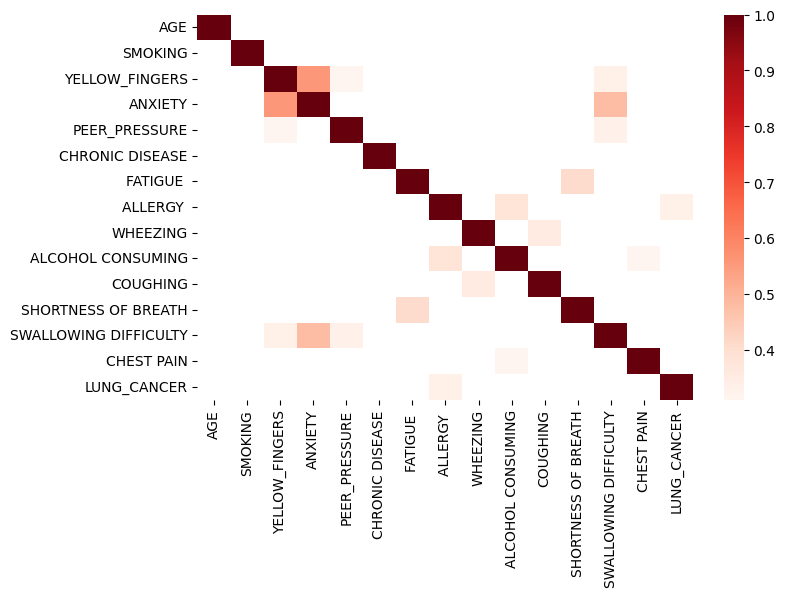

In [21]:
# show heatmap values that have a value of >= 0.30
kot = dataset_correlation[dataset_correlation>=0.3]
plt.figure(figsize=(8,5))
sns.heatmap(kot, cmap="Reds")

From the heatmap above, we can see that "ANXIETY" and "YELLOW_FINGERS" are closely related to each other (56%). I do not want duplicate features, as it will affect the accuracy of the model, so I will only be using one of the two features.

In [22]:
# show how much each symptom relates to lung cancer
dataset_correlation['LUNG_CANCER'].sort_values()

SMOKING                  0.034878
SHORTNESS OF BREATH      0.064407
AGE                      0.106305
CHRONIC DISEASE          0.143692
ANXIETY                  0.144322
FATIGUE                  0.160078
YELLOW_FINGERS           0.189192
CHEST PAIN               0.194856
PEER_PRESSURE            0.195086
WHEEZING                 0.249054
COUGHING                 0.253027
SWALLOWING DIFFICULTY    0.268940
ALCOHOL CONSUMING        0.294422
ALLERGY                  0.333552
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

From the output above, we can see that "SMOKING", "SHORTNESS OF BREATH" and "AGE" does not relate much to lung cancer. So, I will not be using these columns to train my model.

In [23]:
# copy as new dataset
dataset_new = dataset_temp.copy()
  
# drop the feature columns that does not relate much to lung cancer, as well as "ANXIETY" (I will be using "YELLOW_FINGERS")
# I will be dropping "GENDER" as well
dataset_new = dataset_new.drop(columns=["GENDER", "SMOKING", "SHORTNESS OF BREATH", "AGE", "ANXIETY"])
dataset_new

,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0,0,1,0,1,1,1,1,1,1
1,0,0,1,1,1,0,0,0,1,1,1
2,0,1,0,1,0,1,0,1,0,1,0
3,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,0,0,1,1,0,1,1,0,1
280,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,1,1,0,0,0,0,1,0
282,1,0,0,0,0,0,0,0,1,1,0


In [24]:
dataset_new.shape

(276, 11)

In [25]:
dataset_new.columns

Index(['YELLOW_FINGERS', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ',
       'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [26]:
# Extract the features matrix
X = dataset_new.drop("LUNG_CANCER", axis = 1)
X.shape

(276, 10)

In [27]:
# Extract the tagret array
y = dataset_new["LUNG_CANCER"]
y.shape

(276,)

In [28]:
# split the data into a training set and a test set
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

These testing and training sets will be used to train models, predict, and calculate the models' accuracy.

I will be training a few models, using them to predict, testing their accuracy, and decide on a model that fits this dataset the most.

### Logistic Regression - 89.16 %

In [29]:
from sklearn.linear_model import LogisticRegression

#Create and train a model
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(Xtrain, ytrain)
LogisticRegression_preds = LogisticRegression_model.predict(Xtest)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluate the model
LogisticRegression_accuracy_score = round(accuracy_score(ytest, LogisticRegression_preds)*100, ndigits = 2)
print(f"Accuracy of Logistic Regression: {LogisticRegression_accuracy_score} %")

Accuracy of Logistic Regression: 89.16 %


In [31]:
from sklearn.model_selection import cross_val_score

LogisticRegression_cross_val = cross_val_score(LogisticRegression_model, X, y, cv=5)
print("Cross validation score of Logistic Regression Model:")

count = 0
for i in LogisticRegression_cross_val:
    count+=1
    print(f"{count}) {round(i*100, ndigits = 2)} %")

Cross validation score of Logistic Regression Model:
1) 91.07 %
2) 87.27 %
3) 94.55 %
4) 89.09 %
5) 90.91 %


In [32]:
LogisticRegression_classification_report = classification_report(ytest, LogisticRegression_preds)
print(f"Logistic Regression Classification Report : \n{LogisticRegression_classification_report}")

Logistic Regression Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.89      1.00      0.94        70

    accuracy                           0.89        83
   macro avg       0.94      0.65      0.71        83
weighted avg       0.90      0.89      0.87        83



We can see that the accuracy score for using the Logistic Regression Model is 89.16%

### Support Vector Machine Model - 87.95 %

In [33]:
from sklearn.svm import SVC

#Create and train a model
SVM_model = SVC()
SVM_model.fit(Xtrain, ytrain)
SVM_preds = SVM_model.predict(Xtest)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluate the model
SVM_accuracy_score = round(accuracy_score(ytest, SVM_preds)*100, ndigits = 2)
print(f"Accuracy of Support Vector Machine Model: {SVM_accuracy_score} %")

Accuracy of Support Vector Machine Model: 87.95 %


In [35]:
from sklearn.model_selection import cross_val_score

SVM_cross_val = cross_val_score(SVM_model, X, y, cv=5)
print("Cross validation score of Support Vector Machine Model:")

count = 0
for i in SVM_cross_val:
    count+=1
    print(f"{count}) {round(i*100, ndigits = 2)} %")

Cross validation score of Support Vector Machine Model:
1) 87.5 %
2) 85.45 %
3) 89.09 %
4) 83.64 %
5) 92.73 %


In [36]:
SVM_classification_report = classification_report(ytest, SVM_preds)
print(f"Support Vector Machine Classification Report : \n{SVM_classification_report}")

Support Vector Machine Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.88      1.00      0.93        70

    accuracy                           0.88        83
   macro avg       0.94      0.62      0.65        83
weighted avg       0.89      0.88      0.85        83



We can see that the accuracy score for using the Support Vector Machine Model is 87.95%

### Gaussian Naive Bayes Model - 91.57%

In [37]:
from sklearn.naive_bayes import GaussianNB

#Create and train a model
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(Xtrain, ytrain)
GaussianNB_preds = GaussianNB_model.predict(Xtest)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluate the model
GaussianNB_accuracy_score = round(accuracy_score(ytest, GaussianNB_preds)*100, ndigits = 2)
print(f"Accuracy of Gaussian Naive Bayes: {GaussianNB_accuracy_score} %")

Accuracy of Gaussian Naive Bayes: 91.57 %


In [39]:
from sklearn.model_selection import cross_val_score

GaussianNB_cross_val = cross_val_score(GaussianNB_model, X, y, cv=5)
print("Cross validation score of Gaussian Naive Bayes Model:")

count = 0
for i in GaussianNB_cross_val:
    count+=1
    print(f"{count}) {round(i*100, ndigits = 2)} %")

Cross validation score of Gaussian Naive Bayes Model:
1) 87.5 %
2) 87.27 %
3) 96.36 %
4) 83.64 %
5) 90.91 %


In [40]:
GaussianNB_classification_report = classification_report(ytest, GaussianNB_preds)
print(f"Gaussian Naive Bayes Classification Report : \n{GaussianNB_classification_report}")

Gaussian Naive Bayes Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.93      0.97      0.95        70

    accuracy                           0.92        83
   macro avg       0.87      0.79      0.82        83
weighted avg       0.91      0.92      0.91        83



We can see that the accuracy score for using the Gaussian Naive Bayes Model is 91.57%

### K-Nearest Neighbors Model - 92.77%

In [41]:
from sklearn.neighbors import KNeighborsClassifier

#Create and train a model
KNearestNeighbors_model = KNeighborsClassifier(n_neighbors=2)
KNearestNeighbors_model.fit(Xtrain, ytrain)
KNearestNeighbors_preds = KNearestNeighbors_model.predict(Xtest)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluate the model
KNearestNeighbors_accuracy_score = round(accuracy_score(ytest, KNearestNeighbors_preds)*100, ndigits = 2)
print(f"Accuracy of K-Nearest Neighbors Model: {KNearestNeighbors_accuracy_score} %")

Accuracy of K-Nearest Neighbors Model: 92.77 %


In [43]:
from sklearn.model_selection import cross_val_score

KNearestNeighbors_cross_val = cross_val_score(KNearestNeighbors_model, X, y, cv=5)
print("Cross validation score of K-Nearest Neighbors Model:")

count = 0
for i in KNearestNeighbors_cross_val:
    count+=1
    print(f"{count}) {round(i*100, ndigits = 2)} %")

Cross validation score of K-Nearest Neighbors Model:
1) 91.07 %
2) 81.82 %
3) 83.64 %
4) 85.45 %
5) 92.73 %


In [44]:
KNearestNeighbors_classification_report = classification_report(ytest, KNearestNeighbors_preds)
print(f"K-Nearest Neighbors Classification Report : \n{KNearestNeighbors_classification_report}")

K-Nearest Neighbors Classification Report : 
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.97      0.94      0.96        70

    accuracy                           0.93        83
   macro avg       0.85      0.89      0.87        83
weighted avg       0.93      0.93      0.93        83



We can see that the accuracy score for using the K-Nearest Neighbors Model is 92.77%. This model has the highest accuracy as compared to the previous 3 models.

### Validation Curve

A validation curve will be done on the K-Nearest Classifier to see how efficient this model is.

In [45]:
import numpy as np
from sklearn.model_selection import validation_curve

In [46]:
# set the x range
param_range = np.arange(0, 21)

train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                              X, y, param_name="n_neighbors", param_range=param_range,
                              cv=5, scoring="accuracy")

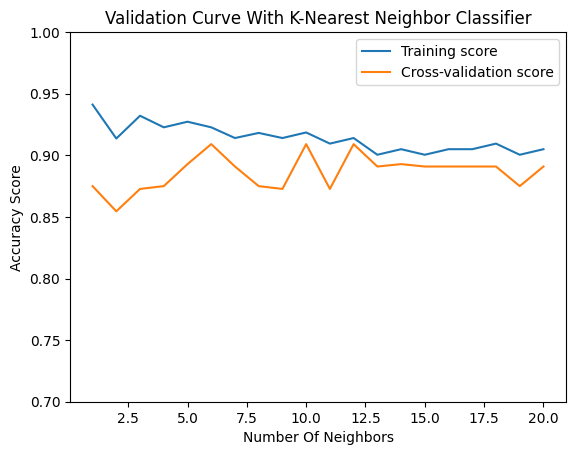

In [47]:
# plot the curves
plt.plot(param_range, np.median(train_scores, 1), label="Training score")
plt.plot(param_range, np.median(test_scores, 1), label="Cross-validation score")

plt.ylim(0.7, 1)
plt.title("Validation Curve With K-Nearest Neighbor Classifier")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

plt.show()

From the graph, we can see that having 2 neighbours is ideal for the model. Both training score and cross-validation score decreases as the model complexity increases.

# 3. Conclusions

### Performance of results
- The performance of the machine learning model will be evaluated via MSE, RMSE, as well as accuracy score and cross-validation score.

In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,KNearestNeighbors_preds, squared=True)
rmse = mean_squared_error(ytest,KNearestNeighbors_preds, squared=False)
print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  0.07228915662650602
RMSE:  0.2688664289689325


As per the calculation above, the RMSE value is about 0.27, which is rather low. This means that using the K-Nearest Neighbors Model for prediction of lung cancer works well.

I've used 4 models, Logistic Regression, Gaussian Naive Bayes, Support Vector Machine and K-Nearest Neighbors Model to compute predictions and test out the accuracy score. The best model to use for diagnosing lung cancer by symptoms in this analysis is the K-Nearest Neighbors Model. 
<br>
<br> It utilizes 11 features as predictors: 
<br> 'YELLOW_FINGERS', 'PEER_PRESSURE', 'CHRONIC DISEASE',
<br> 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING',
<br> 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'
<br>
<br>
The final accuracy of the K-Nearest Neighbors Model is ~92.77%, with a cross-validation score of ~90% for the test data set (ytest).

A validation curve is also done on this model, to check for high bias or high variance. This model performs relatively well, as both high bias and variance are not seen in the validation curve. Therefore, I've chosen to use this model for my lung cancer diagnosis prediction.

[135 words]

### Closing remarks/statements

In this coursework, I was able to train a model with machine learning, that allows prediction of lung cancer diagnosis based on the presence of patients' symptoms. I started out by cleaning and processing the data, ensuring that there weren't any null values, and removing duplicate entries. Visualizations such as the histogram, boxplot, and heatmap are done to help understand the dataset better. It also results in new findings, such as how 'YELLOW_FINGERS' and 'ANXIETY' closely relate to one another in this dataset, so I should only use one of them. These processes help prepare the data for training and testing the model. To the best of my ability, I did training and testing on 4 different models, to conclude which worked the best with this dataset. In the end, the K Nearest Neighbors Model was chosen.

The final model works well, with an almost 93% accuracy score. I believe this would greatly speed up the time spent and reduce the resources used to diagnose lung cancer. Even though this will not be an alternate solution to diagnosing lung cancer, it helps doctors and patients get a quick grasp on whether a further checkup should be done. Patients' appointments could also be better scheduled with such a system, reducing the number of late-diagnosis cases. Even though this model is only done on lung cancer, I believe other cancers or illnesses could utilize this approach as well. Dataset on other symptoms can be acquired, and used to predict other illnesses. Since there may be overlapping symptoms between illnesses, a deeper analysis along with a better algorithm should be used to train the prediction model.

The accuracy of this model can be improved by going into a deeper analysis of the symptoms. Further evaluation of how important each individual or set of symptoms is to a positive diagnosis of lung cancer will improve the accuracy score. A larger dataset with more in-depth findings will also contribute to the prediction model's accuracy. There isn't much I can do now to improve the model, as I do not have access to a better dataset. However, this approach can certainly be done with different programming languages, using other ML libraries, if the dataset is larger and has more details.

[374 words]

# References

Cancer facts &amp; figures 2022 (no date) American Cancer Society. Available at: https://www.cancer.org/research/cancer-facts-statistics/all-cancer-facts-figures/cancer-facts-figures-2022.html (Accessed: November 16, 2022). 

Abdullah Alfayez A, Kunz H, Grace Lai A. Predicting the risk of cancer in adults using supervised machine learning: a scoping review. BMJ Open. 2021 Sep 14;11(9):e047755. doi: 10.1136/bmjopen-2020-047755. PMID: 34521662; PMCID: PMC8442074. 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8442074/

Why is early diagnosis important? (2021) Cancer Research UK. Available at: https://www.cancerresearchuk.org/about-cancer/cancer-symptoms/why-is-early-diagnosis-important (Accessed: November 16, 2022). 

Lung cancer signs &amp; symptoms: Common symptoms of lung cancer (no date) American Cancer Society. Available at: https://www.cancer.org/cancer/lung-cancer/detection-diagnosis-staging/signs-symptoms.html (Accessed: November 19, 2022). 